<a href="https://colab.research.google.com/github/Caloca24/Pycaret_Udemy_Course/blob/main/PyCaretClustering_Jewerly_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pycaret Clustering Module

PyCaret's clustering module (pycaret.clustering) groups a set of objects which are more similar(in relation to members in other groups) to each other within a group.  


In [4]:
!pip install pycaret

In [8]:
import pycaret
print(pycaret.__version__)

3.3.2


#Enable interactive visuals in google colab

In [7]:
#import enable_colab from pycaret.utils
from pycaret.utils import enable_colab
#enable_colab allows execution in google colab
enable_colab()

ImportError: cannot import name 'enable_colab' from 'pycaret.utils' (/usr/local/lib/python3.11/dist-packages/pycaret/utils/__init__.py)

##Workflow for PyCaret Clustering Exercise
1. Download the jewellery dataset from PyCaret
2. Explore the dataset
3. Split the dataset
4. Use the PyCaret Setup() function for preprocessing prior to clustering
5. Create the clustering model
6. Assign labels for clusters
7. Plot the model




In [13]:
#import the get_data function from pycaret.datasets
from pycaret.datasets import get_data
#get the dataset from pycaret
dataset = get_data('jewellery')

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [14]:
import seaborn as sns

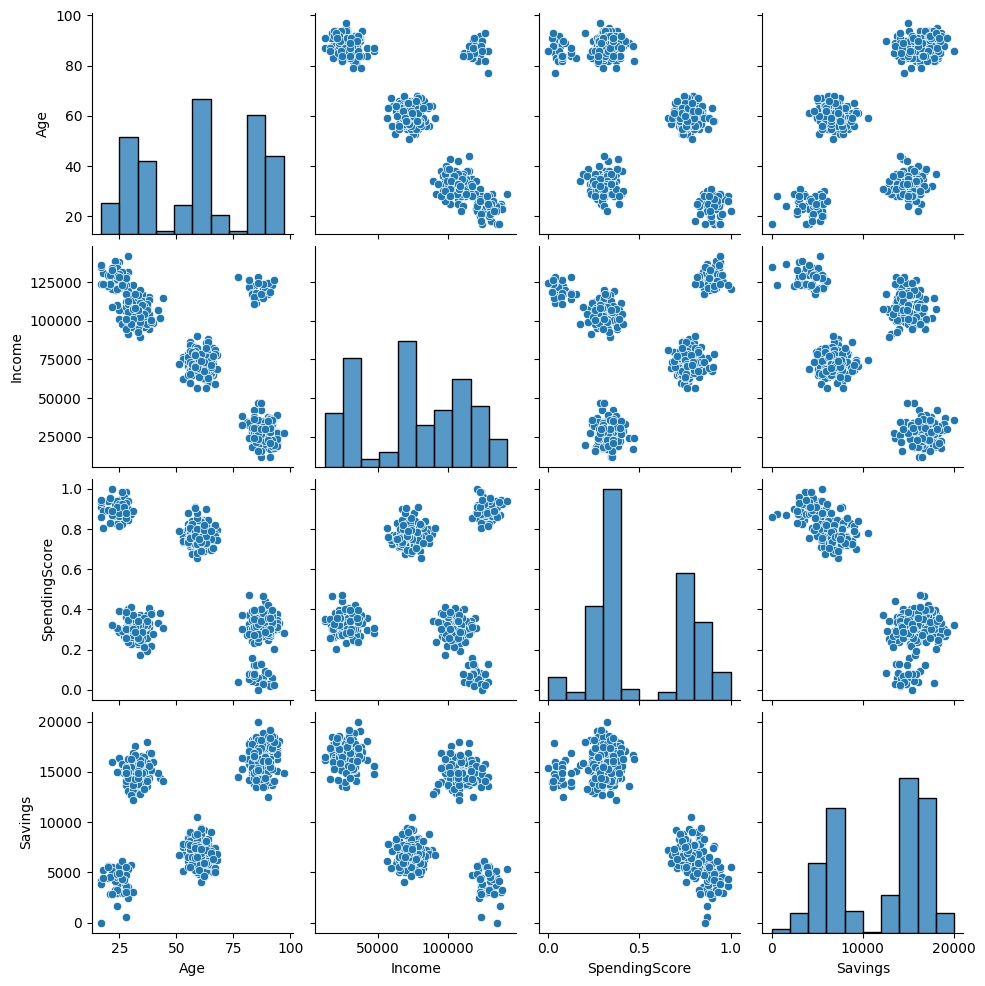

In [15]:
sns.pairplot(dataset)

In [17]:
#check to see if there is any null
dataset.isnull().sum()

,0
Age,0
Income,0
SpendingScore,0
Savings,0


In [18]:
import pandas as pd
dataset.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


In [19]:
from pycaret.clustering import *

exp_clu101 = setup(dataset,
                   session_id= 123)

,Description,Value
0,Session id,123
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [26]:
for i in range(2,7):
  kmeans = create_model('kmeans', i)
  print(kmeans)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5686,1192.4238,0.5855,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=2, random_state=123)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7393,3567.5370,0.3435,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=3, random_state=123)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7207,5011.8115,0.4114,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=4, random_state=123)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6815,4631.7213,0.4697,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=5, random_state=123)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5832,4727.2339,0.5774,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=6, random_state=123)


In [31]:
kmeans = create_model('kmeans', 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7207,5011.8115,0.4114,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [28]:
#print out possible modules
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [32]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.830078,Cluster 2
1,59,81799,0.791082,5417.661621,Cluster 2
2,62,74751,0.702657,9258.993164,Cluster 2
3,59,74373,0.765680,7346.334473,Cluster 2
4,87,17760,0.348778,16869.507812,Cluster 1


In [33]:
kmean_results.Cluster.value_counts()

,count
Cluster,
Cluster 2,156
Cluster 1,147
Cluster 3,130
Cluster 0,72


In [34]:
#generate a 2D cluster PCS plot
plot_model(kmeans, feature='Age')

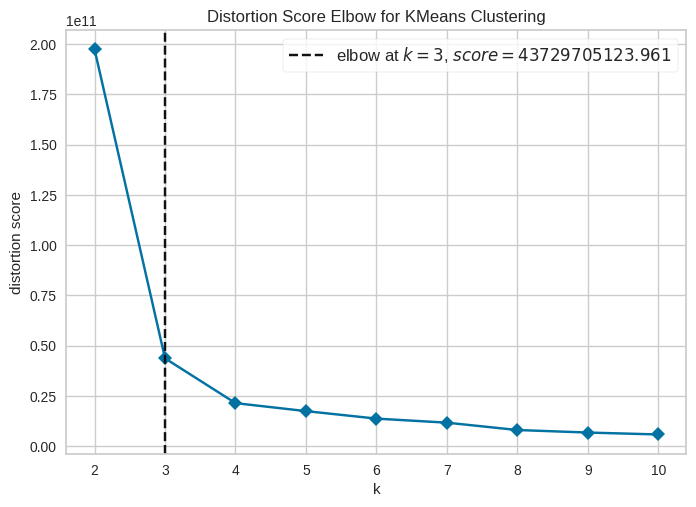

In [35]:
#check to see missing values
plot_model(kmeans, plot = 'elbow')

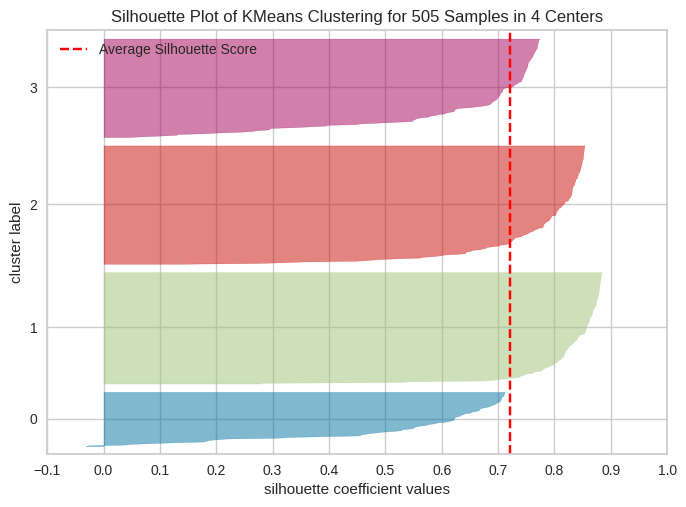

In [37]:
#silhoutte plot:
plot_model(kmeans, plot = 'silhouette')

In [38]:
#display the correlation
plot_model(kmeans, plot = 'distribution')

In [39]:
#generate a tsne plot
plot_model(kmeans, plot = 'tsne', feature= 'Income')

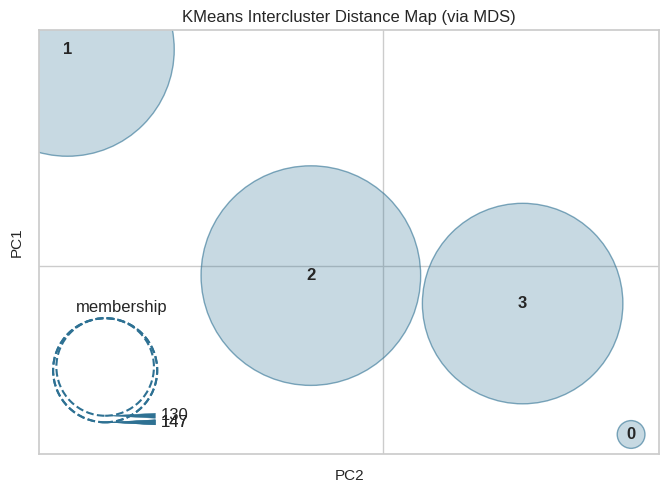

In [41]:
#generate a distance plot
#2 dimension plot, the colser to the centr of the visualization the closer they are in original features space
#sized according to a scoring metric
plot_model(kmeans, plot = 'distance')

#Setup() for clustering


The setup() function preprocesses the data prior to undertaking clustering.
Set up takes two mandatory parameters: the pandas dataframe ('dataset') and the name of the target column.
All other parameters are optional and are used to customize the pre-processing pipeline.
PyCaret's setup function works by running an Inference Algorithm which automatically infers data types for the features, which we can then check. Certain steps are undertaken to prepare the dataset for the algorithm, such as imputation of missing features, one-hot encoding of categorical variables etc.



In [40]:
from pycaret.clustering import *

exp_clu101 = setup(dataset,
                    session_id = 123 )

,Description,Value
0,Session id,123
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

session_id : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

Missing Values : When there are missing values in original data this will show as True. Notice that Missing Values in the information grid above is True as the data contains missing values which are automatically imputed using mean for numeric features and constant for categorical features. The method of imputation can be changed using the numeric_imputation and categorical_imputation parameters in setup().

Original Data : Displays the original shape of dataset. In this experiment (760, 13) means 760 samples and 13 features.

Transformed Data : Displays the shape of the transformed dataset. Notice that the shape of the original dataset (760, 13) is transformed into (760, 811). The number of features has increased due to encoding of categorical features in the dataset.

#Features
We have ignored one categorical feature # using the ignore_feature parameter.
1. Numeric Features : The number of features inferred as numeric. In this dataset, 7 out of 13 features are inferred as numeric.

2. Categorical Features : The number of features inferred as categorical. In this dataset, 5 out of 13 features are inferred as categorical.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. These parameters are out of scope for this tutorial but as you progress to the intermediate and expert levels, we will cover them in much greater detail.

#Create a Model

In [ ]:
#create a kmeans model
kmeans = create_model('kmeans', num_clusters=3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4784,210.1526,0.8895,0,0,0


In [ ]:
#change the number of clusters
kmeans = create_model('kmeans', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3997,207.8159,0.9014,0,0,0


In [ ]:
#change the number of clusters
kmeans = create_model('kmeans', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3698,214.5078,0.9102,0,0,0


In [ ]:
#change the number of clusters
kmeans = create_model('kmeans', num_clusters=6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3188,202.5632,1.0357,0,0,0


Clustering validation is of two types: 1. external clustering validation and 2. internal clustering validation.

1. Silhouette score: In the absence of a ground truth, the silhouette value measures how similar an object is to other objects in its own cluster compared to objects in other clusters. Higher values of the Silhouette index value are preferable and indicate that an object fits well within its own cluster. The mean intra-cluster distance and the mean nearest distance is calculate for every sample to arrive at the Silhouette score.

2. The Calinski-Harabasz score, known as the Variance Ratio Criterion is an internal clustering validation score, and is also used in the absence of a ground truth. As defined in the sci-kit learn documentation, 'the score is defined as the ratio between the within-cluster dispersion(cohesion) and the between-cluster dispersion (separation)'. The higher the value, the better.

3. The Davies Boudlin index: Can be used in the absence of a ground truth. The lower the score the better - the closer the score is to zero, the better- a lower Davies-Bouldin index  proves better separation between the clusters.

3. Homogeneity score: This score needs a ground truth. A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

4. Rand index: This index needs information from more than one clustering method. The Rand index is a measure of the similarity between two data clusterings - it captures the number of times a pair of elements belongs to the same cluster across two clustering methods. The greater the number of times a pair of elements belong to the same cluster, the higher the score.

5. Completeness: The completeness score needs a ground truth. A high score is generated if the data points from a class are located in the same cluster.


In [ ]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [ ]:
#print out the possible models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


#Assign a model

In [ ]:
#assign the pertinent labels
kmean_results = assign_model(kmeans)
kmean_results.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,Cluster 0
1,2,3,7057,9810,9568,1762,3293,1776,Cluster 0
2,2,3,6353,8808,7684,2405,3516,7844,Cluster 0
3,1,3,13265,1196,4221,6404,507,1788,Cluster 0
4,2,3,22615,5410,7198,3915,1777,5185,Cluster 1


In [ ]:
kmean_results.Cluster.value_counts()

Cluster 0    224
Cluster 1    104
Cluster 3     81
Cluster 2     24
Cluster 4      7
Name: Cluster, dtype: int64

#Plot Model

In [ ]:
#generate a 2D cluster PCA plot
plot_model(kmeans, feature='Region')

While the dataset had a large number of features, they have been reduced to 2 principle components while preserving the variance using PCA.


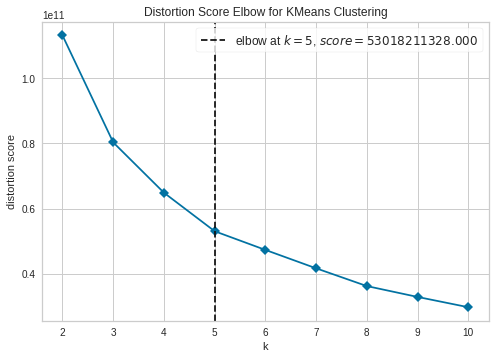

In [ ]:
#Elbow Plot
plot_model(kmeans, plot = 'elbow')
#The elbow method allows us to find the appropriate number of clusters in the plot


The inertia is the sum of the squared distance of samples to their closest cluster centers. Distortion, measured with the Euclidean distance is the average of squared distances from the cluster centers of the respective clusters.
The elbow in the plot is the point after which the ratio of distortion/interia starts decreasing linearly.

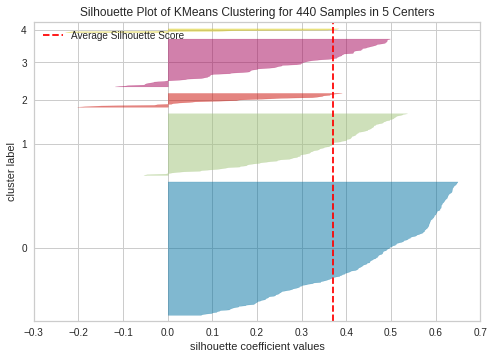

In [ ]:
#generate a silhouette plot
plot_model(kmeans, plot = 'silhouette')

In the absence of being able to ground-truth the data, silhouette is a method of interpretation and validation of consistency within clusters of data, which measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

In [ ]:
#generate a distribution plot
plot_model(kmeans, plot = 'distribution')

In [ ]:
#generate a tsne plot
plot_model(kmeans, plot = 'tsne', feature="Channel")

TSNE is not a clustering algorithm, but a dimensionality reduction algorithm, it depicts the accurate neighborhood of a point.

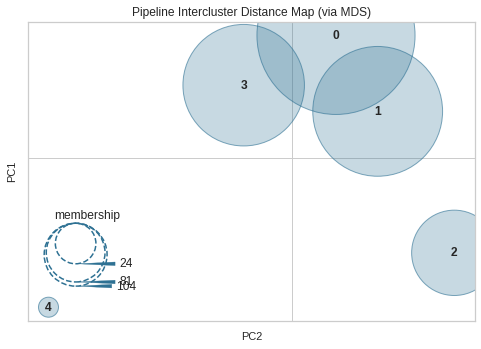

In [ ]:
#generate a distance plot
plot_model(kmeans, plot = 'distance')

#Intercluster distance maps
Intercluster distance maps display an embedding of cluster centers in 2 dimensions with the distance to other centers preserved. The closer to centers are in the visualization, the closer they are in the original feature space.

The clusters are sized according to a scoring metric. By default, they are sized by membership, e.g. the number of instances that belong to each center. This gives a sense of the relative importance of clusters.

Note however, that because two clusters overlap in the 2D space, it does not imply that they overlap in the original feature space.

Source: yellowbricks documentation